In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import numpy as np

In [2]:
species_id = pd.read_csv("~/code/skeeters/data/sample_genus_and_species.csv", header=0, index_col = 0)
species_id.rename(index={'CMS_001_RNA_A_S1':'CMS_001_RNA_A_S1_001'},inplace=True)
species_id.head()

,genus,species,corrected genus,corrected species
CMS_001_RNA_A_S1_001,Culex,erythrothorax,Culex,erythrothorax
CMS_002_10a_Rb_S119_L004,Culex,quinquefasciatus,Culex,quinquefasciatus
CMS_002_13a_Rb_S120_L004,Culex,quinquefasciatus,Culex,quinquefasciatus
CMS_002_16a_Rb_S121_L004,Aedes,aegypti,Aedes,aegypti
CMS_002_17a_Rb_S122_L004,Aedes,aegypti,Aedes,aegypti


In [3]:
dc_tsv = pd.read_csv("sketches/ska/10000000/distances.clusters.tsv", sep='\t')

In [37]:
dd_tsv = pd.read_csv("sketches/ska/10000000/distances.distances.tsv", sep='\t')
shape_dd_tsv = dd_tsv.shape

# Add prefix columns and size
dd_tsv["Sample 1 prefix"] = dd_tsv.apply(lambda row: row["Sample 1"].split("_10000000")[0], axis=1)
dd_tsv["Sample 2 prefix"] = dd_tsv.apply(lambda row: row["Sample 2"].split("_10000000")[0], axis=1)
dd_tsv["Size"] = dd_tsv.apply(lambda row: row["Sample 2"].split("_")[-1], axis=1)

dd_tsv.drop(['Sample 1', 'Sample 2'], axis=1)

# re-organize columns
dd_tsv = dd_tsv[["Sample 1 prefix", 
                 "Sample 2 prefix", 
                 "Size", "Matches", 
                 "Mismatches", 
                 "Jaccard Index",
                 "Mash-like distance",
                 "SNPs",
                 "SNP distance",
                ]]

# join on species data table
dd_tsv_w_labels = pd.merge(
    dd_tsv, 
    species_id[["genus", "species"]], 
    how='left',
    left_on="Sample 1 prefix", 
    right_index=True, 
)

# assert original data frame did not expand in row number
assert shape_dd_tsv[0] == dd_tsv_w_labels.shape[0]

# dd_tsv.Matches/(dd_tsv.Matches + dd_tsv.Mismatches)

In [38]:
dd_tsv_w_labels.head()

,Sample 1 prefix,Sample 2 prefix,Size,Matches,Mismatches,Jaccard Index,Mash-like distance,SNPs,SNP distance,genus,species
0,CMS_001_RNA_A_S1_001,CMS_002_10a_Rb_S119_L004_001,10000000,107591,796458,0.119010,0.049930,590,0.005484,Culex,erythrothorax
1,CMS_001_RNA_A_S1_001,CMS_002_13a_Rb_S120_L004_001,10000000,124812,898057,0.122021,0.049211,683,0.005472,Culex,erythrothorax
2,CMS_001_RNA_A_S1_001,CMS_002_16a_Rb_S121_L004_001,10000000,64767,1005138,0.060535,0.070005,591,0.009125,Culex,erythrothorax
3,CMS_001_RNA_A_S1_001,CMS_002_17a_Rb_S122_L004_001,10000000,67326,950575,0.066142,0.067318,585,0.008689,Culex,erythrothorax
4,CMS_001_RNA_A_S1_001,CMS_002_17b_Rb_S123_L004_001,10000000,68380,970402,0.065827,0.067462,593,0.008672,Culex,erythrothorax


In [69]:
dd_tsv_pivot = dd_tsv_w_labels.pivot(columns="Sample 1 prefix", index="Sample 2 prefix", values="Jaccard Index")
dd_tsv_pivot = dd_tsv_pivot.loc[dd_tsv_pivot.columns, :]
np.fill_diagonal(dd_tsv_pivot.values, 1)
dd_tsv_pivot = dd_tsv_pivot.fillna(0) + dd_tsv_pivot.T.fillna(0) - np.diag(dd_tsv_pivot.values.diagonal())
dd_tsv_pivot.head()

/Users/phoenix.logan/anaconda3/envs/ska/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Sample 1 prefix,CMS_001_RNA_A_S1_001,CMS_002_10a_Rb_S119_L004_001,CMS_002_13a_Rb_S120_L004_001,CMS_002_16a_Rb_S121_L004_001,CMS_002_17a_Rb_S122_L004_001,CMS_002_17b_Rb_S123_L004_001,CMS_002_17c_Rb_S124_L004_001,CMS_002_17d_Rb_S125_L004_001,CMS_002_17e_Rb_S126_L004_001,CMS_002_18a_Rb_S128_L004_001,...,CMS_055_RNA_A_S9_001,CMS_056_RNA_A_S10_001,CMS_057_RNA_A_S11_001,CMS_058_RNA_A_S9_001,CMS_059_RNA_A_S10_001,CMS_060_RNA_A_S12_001,CMS_water1_S11_001,CMS_water2_S24_001,CMS_water3_Qiagen_S26_001,CMS_water4_Zymo_S27_001
Sample 1 prefix,,,,,,,,,,,,,,,,,,,,,
CMS_001_RNA_A_S1_001,1.000000,0.119010,0.122021,0.060535,0.066142,0.065827,0.063517,0.064399,0.068669,0.064455,...,0.258635,0.257638,0.291582,0.389049,0.232260,0.110511,0.003055,0.015007,0.170193,0.015135
CMS_002_10a_Rb_S119_L004_001,0.119010,1.000000,0.283042,0.067495,0.074937,0.071484,0.064463,0.070734,0.077745,0.074768,...,0.149252,0.147617,0.143208,0.125603,0.197623,0.077181,0.006466,0.022805,0.136723,0.015981
CMS_002_13a_Rb_S120_L004_001,0.122021,0.283042,1.000000,0.065747,0.074175,0.071659,0.068646,0.070440,0.076566,0.066730,...,0.133288,0.129970,0.125561,0.127216,0.209097,0.071291,0.005096,0.027803,0.136058,0.021976
CMS_002_16a_Rb_S121_L004_001,0.060535,0.067495,0.065747,1.000000,0.268925,0.265659,0.233245,0.271617,0.239203,0.232836,...,0.075014,0.068719,0.067324,0.063249,0.061793,0.072135,0.004805,0.014879,0.065706,0.012021
CMS_002_17a_Rb_S122_L004_001,0.066142,0.074937,0.074175,0.268925,1.000000,0.311575,0.276359,0.309452,0.281020,0.260866,...,0.080805,0.076767,0.075495,0.068768,0.067613,0.078878,0.005899,0.020792,0.073848,0.016634


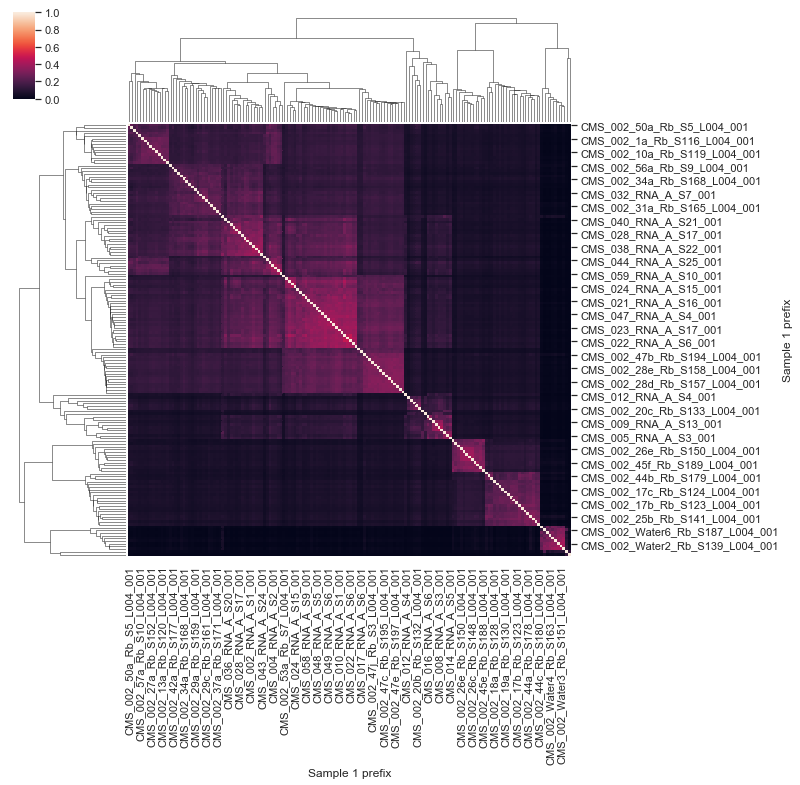

In [71]:
sns.clustermap(dd_tsv_pivot, metric="correlation")